# Laboratorio 1(Machine Learning)

Dataset.- ([House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction "Dataset")) Mediante las caracteristicas de una casa, se puede llegar a predecir el precio estimado de una casa.


### Variables de entrada(X):
- numero de dormitorios
- numero de baños
- pies cuadrados_living
- ote_pies cuadrados
- pisos
- frente al mar 
- vista
- condición
- calificación
- pies cuadrados_arriba
- pies cuadrados_sótano
- año_construcción
- año_renovado
- código postal
- latitud
- largo
- pies cuadrados_living
- pies cuadrados_lote

### Variable de salida(Y):
- Prediccion del precio de una vivienda
#### Especificacion de cada columna.-
- **Primera columna(id).-** Un id que identifica a cada casa dentro del dataset.
- **Segunda colmumna(date).-** Fecha en la que se añadio la casa al dataset.
- **Tercer columna(bedrooms).-** Especifica el numero de dormitorios que contiene la casa.
- **Cuarta columna(bathrooms).-** Especifica el numero de dormitorios que contiene la casa.
- **Quinta columna(sqft_living).-** Pies cuadrados habitables. Esta expresión se utiliza para indicar la medida del espacio interior utilizable en una vivienda o edificación.
- **Sexta columna(sqft_lot).-** Pies cuadrados del lote. Este término se utiliza para indicar la medida del terreno o parcela en la que se encuentra una propiedad.
- **Septima columna(floors).-** El numero de pisos que contine la casa.
- **Octava columna(waterfront).-** significa que se encuentra en la línea de costa o a orillas de un cuerpo de agua. 1 para si, y 0 para no.
- **Novena columna(view).-** La presencia de una buena vista puede tener un impacto significativo en el valor y atractivo de una propiedad. 1 si 0 no.
- **Decima columna(condition).-** Se refiere al estado general de una propiedad, es decir, a su condición física y estructural, del 1 al 5.
- **Onceava columna(grade).-** Se refiere al grado de pocision de la casa.
- **Doceava columna(sqft_above).-** Pies cuadrados arriba. Este término se utiliza para describir la medida del espacio habitable en una propiedad que está ubicado por encima del nivel del suelo
- **Treceava columna(sqft_basement).-** Pies cuadrados del sótano. Este término se utiliza para describir la medida del espacio habitable que se encuentra en el sótano de una propiedad.
- **Catorceava columna(yr_built).-** Refiere al año de construcción de una propiedad. Este término se utiliza para indicar el año en que la estructura principal de una casa, edificio o propiedad fue construida.
- **Quinceava columna(yr_renovated).-** refiere al año en que una propiedad fue renovada.
- **Dieciseisava columna(zipcode).-** Es un término utilizado en los Estados Unidos para referirse al código postal de una determinada área geográfica. 
- **Diecisiteava columna(lat).-** Generalmente se refiere a la latitud de una ubicación geográfica específica.
- **Dieciochoava columna(long).-** Generalmente se refiere a la longitud de una ubicación geográfica específica.
- **Diecinueveava columna(sqft_living15).-** es un término utilizado en bienes raíces para describir la medida del espacio habitable de una propiedad específica,sugiere que la medida se refiere a la superficie habitable específica para el año 2015.
- **Veinteava columna(sqft_lot15).-** es un término utilizado en bienes raíces para describir la medida del tamaño del terreno de una propiedad específica, se refiere al tamaño del terreno específico para el año 2015.

## 1. regresion lineal multivariable
Se implementa la regresion lineal multivariable para predecir el precio de las casas en USA. El archivo `kc_house_data.csv` contiene un conjunto de entrenamiento de precios de casas en en el condado mde King, Estado Unidos.
a continuacion se especifica cada columna del dataset.-



In [2]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


#### Cargamos los datos del dataset


In [250]:
# Cargamos los datos utilizando pandas
data = pd.read_csv('kc_house_data.csv', delimiter=',')

#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y
dataset = data.drop(['id','date','price'], axis = 1).astype(float)

# Seleccionamos las columnas para X y la columna 'price' para y
X = dataset.values
y = data['price'].values
m = len(y)

# Ahora, X y y deberían contener datos numéricos

# imprimir todos las X de datos
# imprimir todos las X de datos pero el número de impresiones que sea 100
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'Y'
))
print('-' * 172)

for i in range(100):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:10.0f}{:10.0f}{:10.0f}{:10.2f}{:10.2f}{:10.0f}{:11.0f}{:14.0f}'.format(
        X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], X[i, 9], X[i, 10], X[i, 11],
        X[i, 12], X[i, 13], X[i, 14], X[i, 15], X[i, 16], X[i, 17], y[i]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]         Y
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       3       1      1180      5650       1       0       0       3       7      1180       0      1955         0     98178     47.51   -122.26      1340       5650        221900
       3       2      2570      7242       2       0       0       3       7      2170     400      1951      1991     98125     47.72   -122.32      1690       7639        538000
       2       1       770     10000       1       0       0       3       6       770       0      1933         0     98028     47.74   -122.23      2720       8062        180000
       4       3      1960      5000       1       0       0       5       7      1050     910      1965       

<a id="section4"></a>
### 1.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. En este caso
### Hacemos el uso de la siguiente funcion para normalizar los datos

In [235]:
def  featureNormalize(X):
    X_norm = X.copy()
    
    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[0])
    sigma = np.zeros(X.shape[0])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma


In [242]:
# llama featureNormalize con los datos cargados

X_norm, mu, sigma = featureNormalize(X)

print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_norm[:,0]', '  X_norm[:, 1]', '  X_norm[:, 2]', '  X_norm[:, 3]', '  X_norm[:, 4]', '  X_norm[:, 5]', '  X_norm[:, 6]', '  X_norm[:, 7]', '  X_norm[:, 8]', '  X_norm[:, 9]', '  X_norm[:, 10]', '  X_norm[:, 11]',
    '  X_norm[:, 12]', '  X_norm[:, 13]', '  X_norm[:, 14]', '  X_norm[:, 15]', '  X_norm[:, 16]', '  X_norm[:, 17]'
))
print('-' * 172)

for i in range(10):
    print('{:8.4f}{:17.4f}{:13.4f}{:14.4f}{:15.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11],
        X_norm[i, 12], X_norm[i, 13], X_norm[i, 14], X_norm[i, 15], X_norm[i, 16], X_norm[i, 17]
    ))

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)


X_norm[:,0]  X_norm[:, 1]  X_norm[:, 2]  X_norm[:, 3]  X_norm[:, 4]  X_norm[:, 5]  X_norm[:, 6]  X_norm[:, 7]  X_norm[:, 8]  X_norm[:, 9]  X_norm[:, 10]  X_norm[:, 11]  X_norm[:, 12]  X_norm[:, 13]  X_norm[:, 14]  X_norm[:, 15]  X_norm[:, 16]  X_norm[:, 17]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 -0.3987          -1.4475      -0.9798       -0.2283        -0.9154       -0.0872       -0.3058       -0.6292       -0.5588       -0.7347        -0.6587        -0.5449        -0.2101         1.8702        -0.3526        -0.3061        -0.9434        -0.2607
 -0.3987           0.1756       0.5336       -0.1899         0.9365       -0.0872       -0.3058       -0.6292       -0.5588        0.4608         0.2451        -0.6811         4.7467         0.8796         1.1616        -0.7463        -0.4327        -0.1879
 -1.4740          -1.4475      -1.4263       -0.1233 

## Graficamos los datos

In [257]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  # pyplot.plot((x, y), '-')
  
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

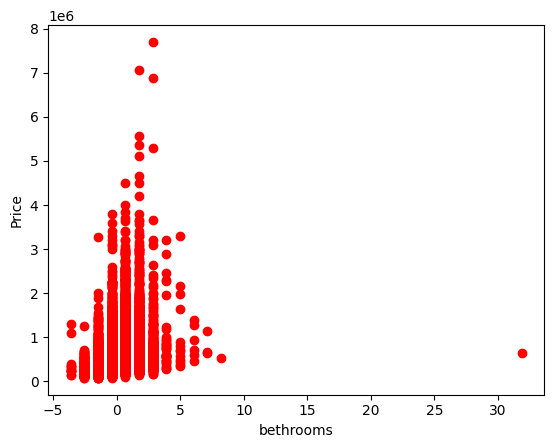

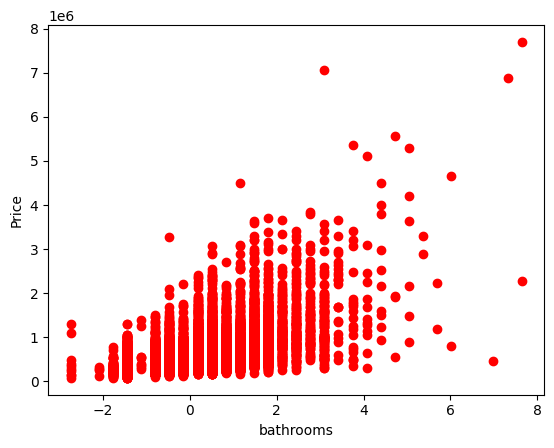

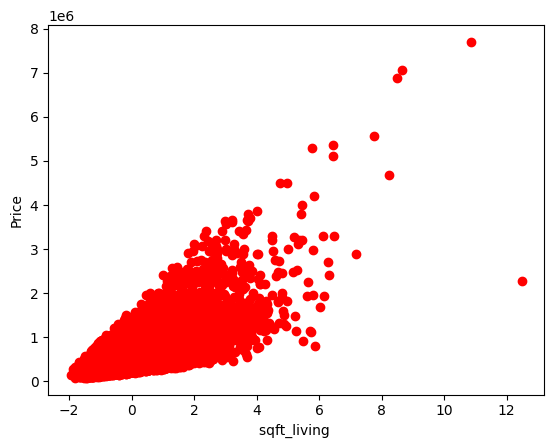

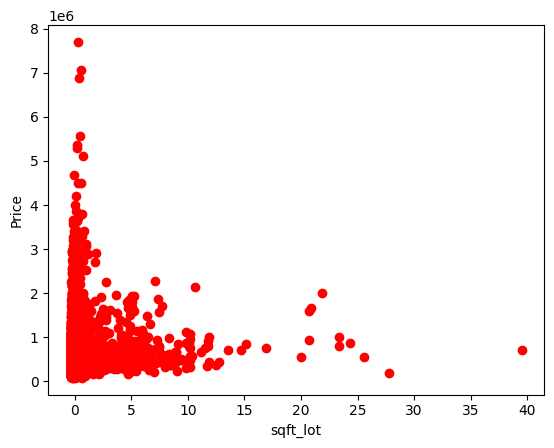

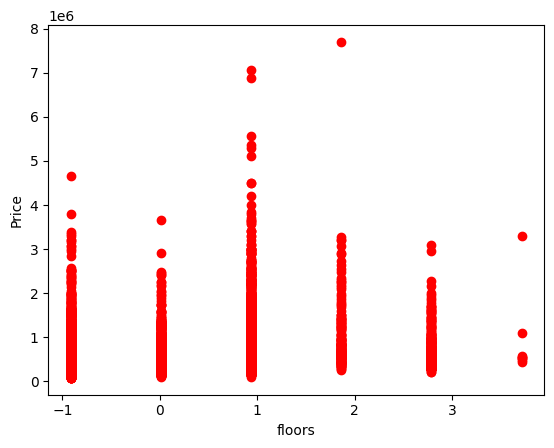

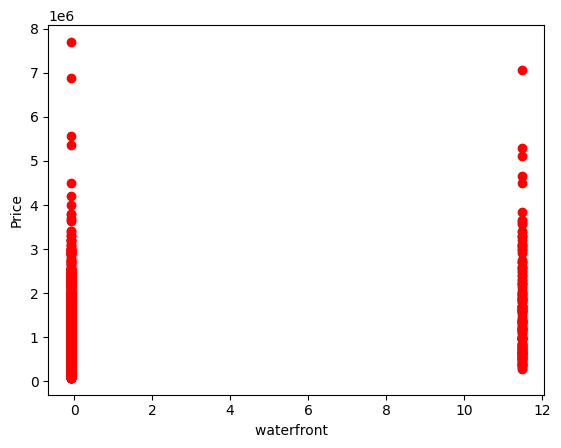

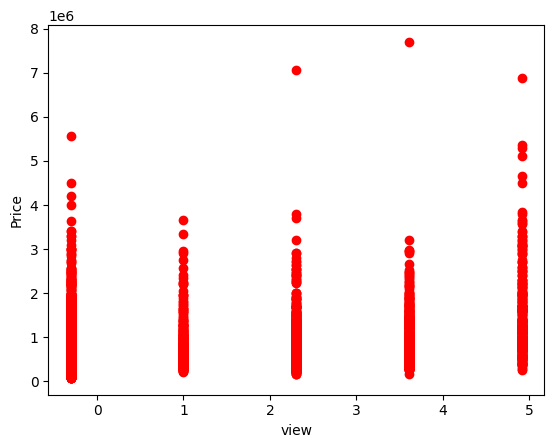

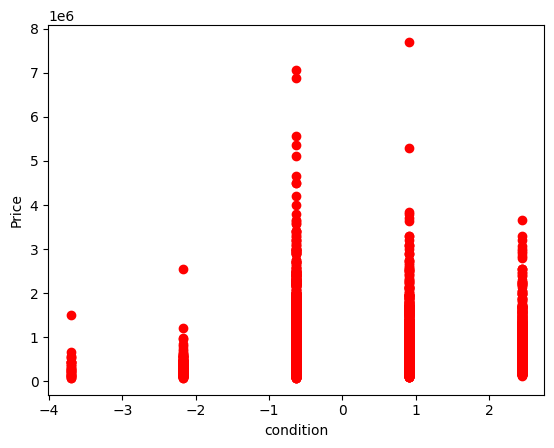

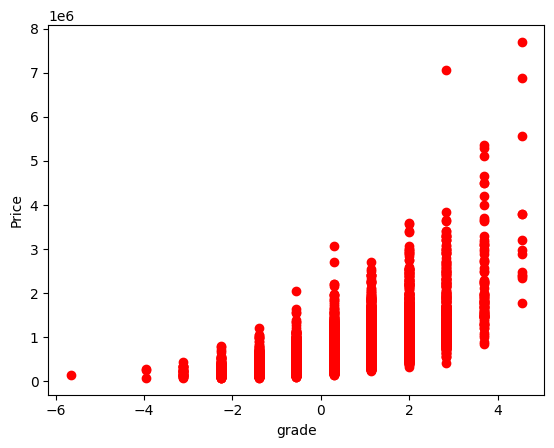

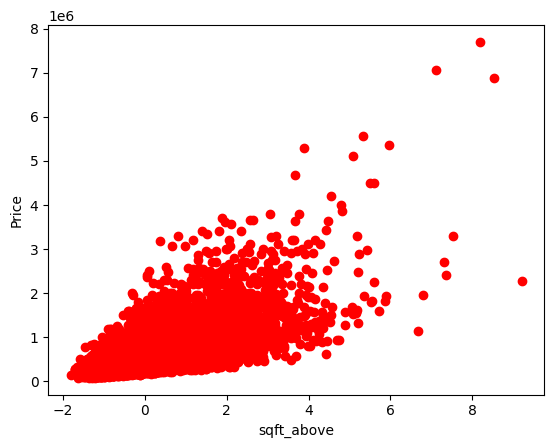

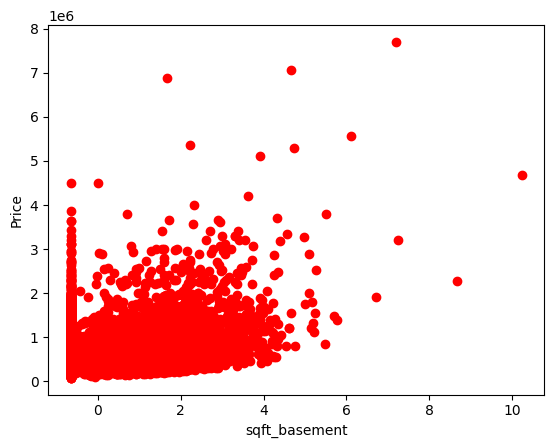

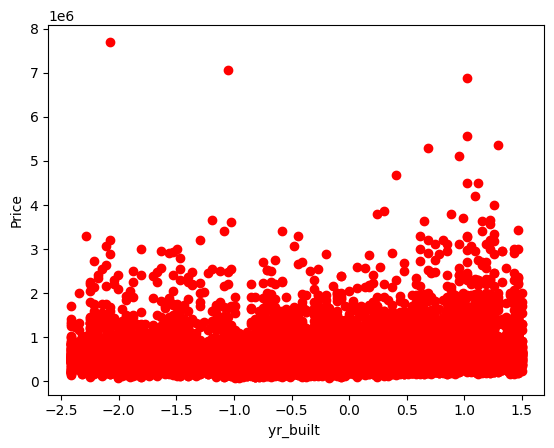

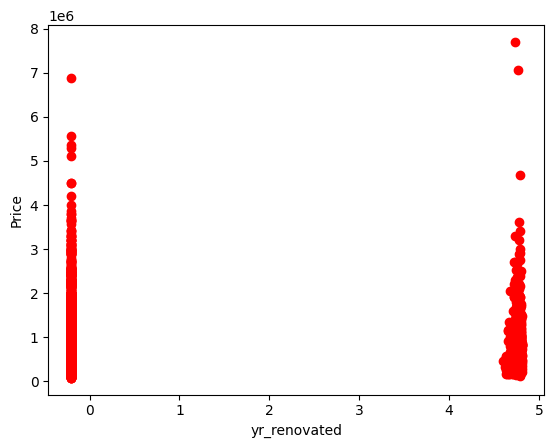

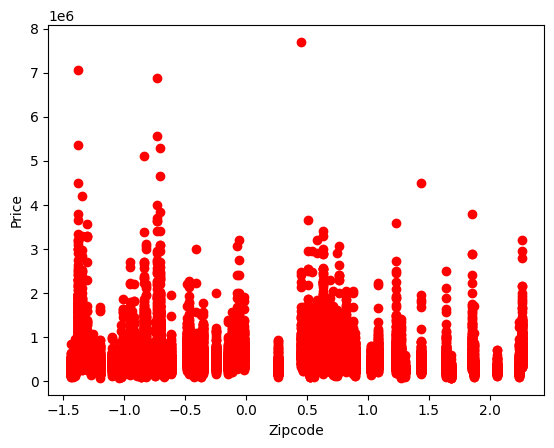

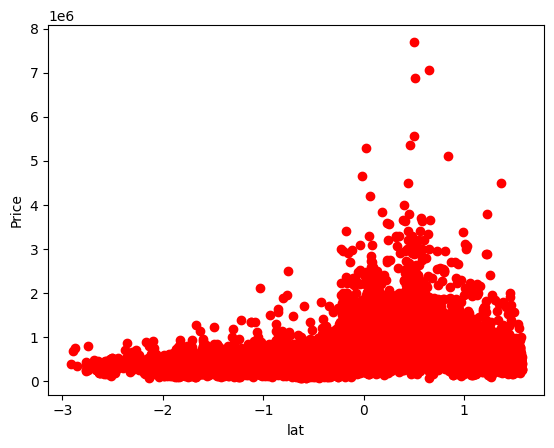

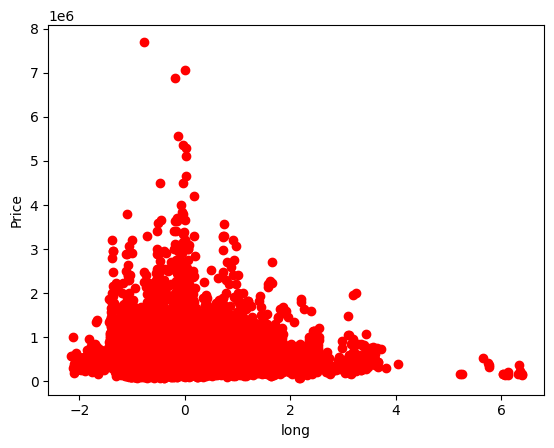

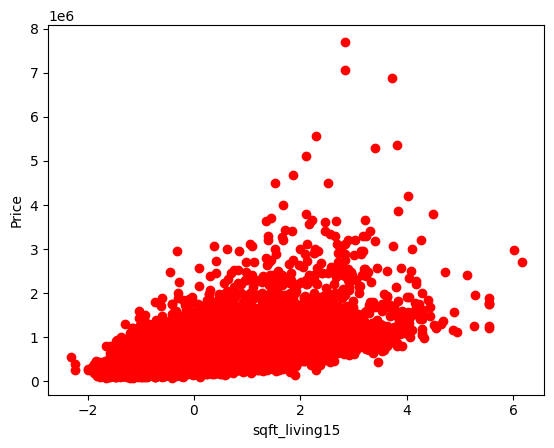

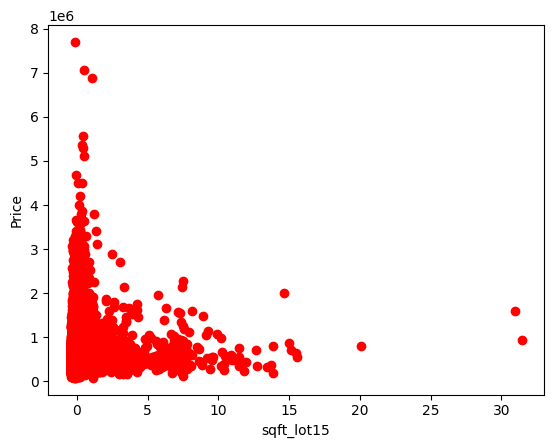

In [266]:

xlabel1 = "bethrooms"
xlabel2 = "bathrooms"
xlabel3 = "sqft_living "
xlabel4 = "sqft_lot"
xlabel5 = "floors"
xlabel6 = "waterfront  "
xlabel7 = "view"
xlabel8 = "condition"
xlabel9 = "grade"
xlabel10 = "sqft_above"
xlabel11 = "sqft_basement"
xlabel12 = "yr_built "
xlabel13 = "yr_renovated"
xlabel14 = "Zipcode"
xlabel15 = "lat"
xlabel16 = "long"
xlabel17 = "sqft_living15"
xlabel18 = "sqft_lot15"

ylabel1 = "Price"
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y, xlabel5, ylabel1)
graficarDatos(X_norm[:, 5], y, xlabel6, ylabel1)
graficarDatos(X_norm[:, 6], y, xlabel7, ylabel1)
graficarDatos(X_norm[:, 7], y, xlabel8, ylabel1)
graficarDatos(X_norm[:, 8], y, xlabel9, ylabel1)
graficarDatos(X_norm[:, 9], y, xlabel10, ylabel1)
graficarDatos(X_norm[:, 10], y, xlabel11, ylabel1)
graficarDatos(X_norm[:, 11], y, xlabel12, ylabel1)
graficarDatos(X_norm[:, 12], y, xlabel13, ylabel1)
graficarDatos(X_norm[:, 13], y, xlabel14, ylabel1)
graficarDatos(X_norm[:, 14], y, xlabel15, ylabel1)
graficarDatos(X_norm[:, 15], y, xlabel16, ylabel1)
graficarDatos(X_norm[:, 16], y, xlabel17, ylabel1)
graficarDatos(X_norm[:, 17], y, xlabel18, ylabel1)



# <a id="section2"></a>
### 1.2 Descenso por el gradiente

Primero agregamos unos a la matriz de X

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [243]:
# No olvidarse agregar unos a la matriz de x

X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

#Imprimimos X_ready
print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_ready[:,0]', '  X_ready[:, 1]', '  X_ready[:, 2]', '  X_ready[:, 3]', '  X_ready[:, 4]', '  X_ready[:, 5]', '  X_ready[:, 6]', '  X_ready[:, 7]', '  X_ready[:, 8]', '  X_ready[:, 9]', '  X_ready[:, 10]', '  X_ready[:, 11]',
    '  X_ready[:, 12]', '  X_ready[:, 13]', '  X_ready[:, 14]', '  X_ready[:, 15]', '  X_ready[:, 16]', '  X_ready[:, 17]', '  X_ready[:, 18]'
))
print('-' * 292)

for i in range(10):
    print('{:10.0f}{:17.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:17.4f}{:15.4f}{:17.4f}{:17.4f}{:14.4f}{:17.4f}{:15.4f}{:17.4f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11],
        X_ready[i, 12], X_ready[i, 13], X_ready[i, 14], X_ready[i, 15], X_ready[i, 16], X_ready[i, 17], X_ready[i, 18]
    ))

X_ready[:,0]  X_ready[:, 1]  X_ready[:, 2]  X_ready[:, 3]  X_ready[:, 4]  X_ready[:, 5]  X_ready[:, 6]  X_ready[:, 7]  X_ready[:, 8]  X_ready[:, 9]  X_ready[:, 10]  X_ready[:, 11]  X_ready[:, 12]  X_ready[:, 13]  X_ready[:, 14]  X_ready[:, 15]  X_ready[:, 16]  X_ready[:, 17]  X_ready[:, 18]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         1          -0.3987        -1.4475        -0.9798        -0.2283        -0.9154        -0.0872        -0.3058        -0.6292        -0.5588        -0.7347          -0.6587        -0.5449          -0.2101           1.8702       -0.3526          -0.3061        -0.9434          -0.2607
         1          -0.3987         0.1756         0.5336        -0.1899         0.9365        -0.0872        -0.3058      

In [258]:
#Creamos la funcion de calcular costo
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  #h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$. 

In [365]:
theta=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8, 5.8, 0.9,0.7, 2.0, 0.5,0.8, 1.0, 0.2,0.3])
theta1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7,0.7, 7.1, 0.6,0.6, 1.0, 0.3,0.9, 2.0, 0.12,0.7])

print(theta.shape[0])
# theta1=np.array([0.5, 7.0, 0.2])

print(f"########################################################################################################")
print(f"con theta:{ theta } se obtiene un costo de: {calcularCosto(X_ready, y, theta)}")
print(f"########################################################################################################")
print(f"con theta:{ theta1 } se obtiene un costo de: {calcularCosto(X_ready, y, theta1)}")

19
########################################################################################################
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8 5.8 0.9 0.7 2.  0.5 0.8 1.  0.2
 0.3] se obtiene un costo de: 213232793888.70496
########################################################################################################
con theta:[0.1  2.   0.5  0.2  8.   0.7  1.3  8.   1.7  0.7  7.1  0.6  0.6  1.
 0.3  0.9  2.   0.12 0.7 ] se obtiene un costo de: 213231559370.24106


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

In [301]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

########################################################################################################
Los valores de theta calculados son:
theta 1: 540088.1417664639
theta 2: -33264.32550989378
theta 3: 31687.074098396715
theta 4: 81812.5073529074
theta 5: 5326.466322750969
theta 6: 3612.1992187919573
theta 7: 50434.938416901976
theta 8: 40514.9947653643
theta 9: 17169.880534719538
theta 10: 112712.65549253485
theta 11: 76305.5202100827
theta 12: 27005.679623374162
theta 13: -76963.11196352806
theta 14: 7958.119519910723
theta 15: -31161.669305082727
theta 16: 83517.09849660088
theta 17: -30239.34630237518
theta 18: 14859.899565430713
theta 19: -10447.480136998463
########################################################################################################
con un costo de: 20233457778.74639 


Text(0, 0.5, 'Costo J')

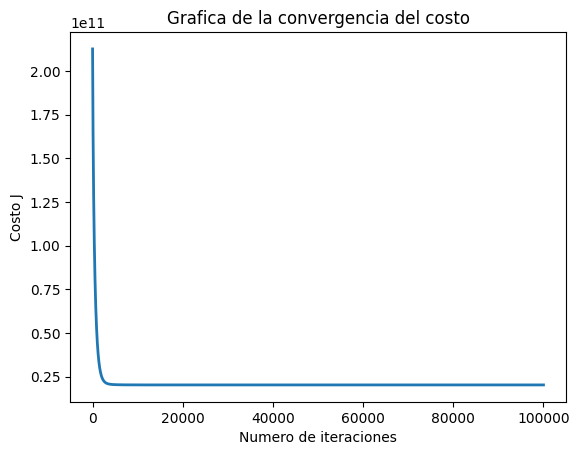

In [375]:
#creamos un theta con 19 columnas
theta = np.zeros(19)

num_ite = 100000
alpha = 0.0009

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")

    
print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



Se utilizan los parametros finales para grafical la linea.

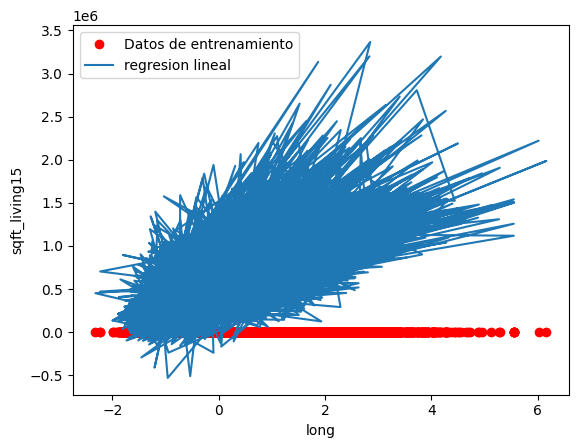

In [376]:
graficarDatos(X_ready[:, 17], X_ready[:, 18], xlabel16, xlabel17)

pyplot.plot(X_ready[:, 17], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

### Ejemplos de Predicciones

#### Ejemplo 1
se desea predecir el precio de una casa dada las siguientes caracteristicas:
- numero de dormitorios = 3
- numero de baños = 1
- pies cuadrados_living = 1180
- lote_pies cuadrados = 5650
- pisos = 1
- frente al mar = 0
- vista = 0
- condición = 3
- calificación = 7
- pies cuadrados_arriba = 1180
- pies cuadrados_sótano = 0
- año_construcción = 1955
- año_renovado = 0
- código postal = 98178
- latitud = 47.5112
- largo = -122.257
- pies cuadrados_living = 1340
- pies cuadrados_lote = 5650

In [392]:
numero_de_dormitorios = 3
numero_de_baños = 1
pies_cuadrados_living = 1180
lote_pies_cuadrados = 5650
pisos = 1
frente_al_mar = 0
vista = 0
condición = 3
calificación = 7
pies_cuadrados_arriba = 1180
pies_cuadrados_sótano = 0
año_construcción = 1955
año_renovado = 0
código_postal = 98178
latitud = 47.5112
largo = -122.257
pies_cuadrados_living = 1340
pies_cuadrados_lote = 5650

#tenemos el array de datos a para predecir un precio:
datos= np.array([1,numero_de_dormitorios,numero_de_baños,pies_cuadrados_living,lote_pies_cuadrados,pisos,frente_al_mar,vista,condición,calificación,pies_cuadrados_arriba,pies_cuadrados_sótano,año_construcción,año_renovado,código_postal,latitud,
                 largo,pies_cuadrados_living,pies_cuadrados_lote])

#Normalizamos todos, menos el primer valor
datos[1:] = (datos[1:] - mu) / sigma

predict1 = np.dot(datos, theta)
print('Para los datos ingresados, se predice un precio de ${:.2f}\n'.format(predict1))

Para los datos ingresados, se predice un precio de $223130.69



In [ ]:
#Utilizando la ecuacion de la norma

In [ ]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [ ]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [89597.9095428    139.21067402 -8738.01911233]


In [ ]:
X_array = [1, 2305, 4]
price = np.dot(X_array, theta) 

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $375526


# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación